In [1]:
#pip install arch

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Download data
ticker = "^IXIC"  # Adjust the ticker as per the Yahoo Finance listing
start_date = '2022-04-01'
end_date = '2024-03-31'

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns

In [5]:
# Display the first few rows of the data
print(data.head())

                    Open          High           Low         Close  \
Date                                                                 
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   
2022-04-07  13861.490234  13978.250000  13689.230469  13897.299805   

               Adj Close      Volume  
Date                                  
2022-04-01  14261.500000  5002790000  
2022-04-04  14532.549805  4630100000  
2022-04-05  14204.169922  4727710000  
2022-04-06  13888.820312  5360420000  
2022-04-07  13897.299805  4856090000  


In [6]:
# Calculate returns
data['Return'] = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns
data = data.dropna()  # Drop rows with NaN values resulting from pct_change()

In [7]:
# Check for ARCH effects using the Ljung-Box test on squared returns
lb_test = sm.stats.diagnostic.acorr_ljungbox(data['Return']**2, lags=[10], return_df=True)
print('Ljung-Box test for ARCH effects:')
print(lb_test)

Ljung-Box test for ARCH effects:
      lb_stat     lb_pvalue
10  85.481431  4.194475e-14


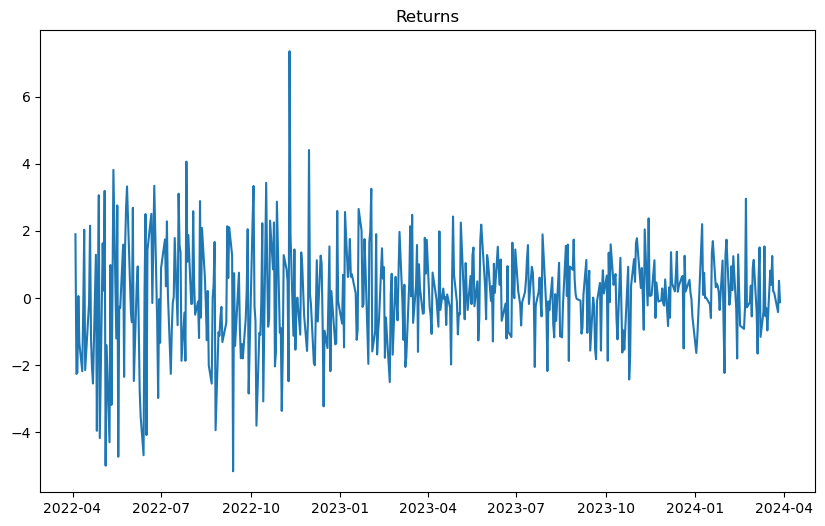

In [8]:
# Check for ARCH/GARCH effects
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.title('Returns')
plt.show()

In [9]:
# Fit an ARCH/GARCH model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit(disp='off')
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -863.743
Distribution:                  Normal   AIC:                           1735.49
Method:            Maximum Likelihood   BIC:                           1752.34
                                        No. Observations:                  499
Date:                Tue, Jul 23 2024   Df Residuals:                      498
Time:                        19:51:48   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0996  5.789e-02      1.721  8.533e-02 [-1.38

In [10]:
# Forecast the three-month volatility
forecast = results.forecast(horizon=90)
volatility_forecast = forecast.variance[-1:]  # Last forecasted variance
volatility_forecast = volatility_forecast.apply(lambda x: x**0.5)  # Convert to standard deviation
print(volatility_forecast)

                h.01      h.02    h.03      h.04      h.05      h.06  \
Date                                                                   
2024-03-28  0.918856  0.918377  0.9179  0.917427  0.916956  0.916488   

                h.07     h.08    h.09      h.10  ...      h.81      h.82  \
Date                                             ...                       
2024-03-28  0.916022  0.91556  0.9151  0.914644  ...  0.888396  0.888102   

               h.83     h.84      h.85      h.86     h.87      h.88      h.89  \
Date                                                                            
2024-03-28  0.88781  0.88752  0.887231  0.886945  0.88666  0.886377  0.886095   

                h.90  
Date                  
2024-03-28  0.885816  

[1 rows x 90 columns]


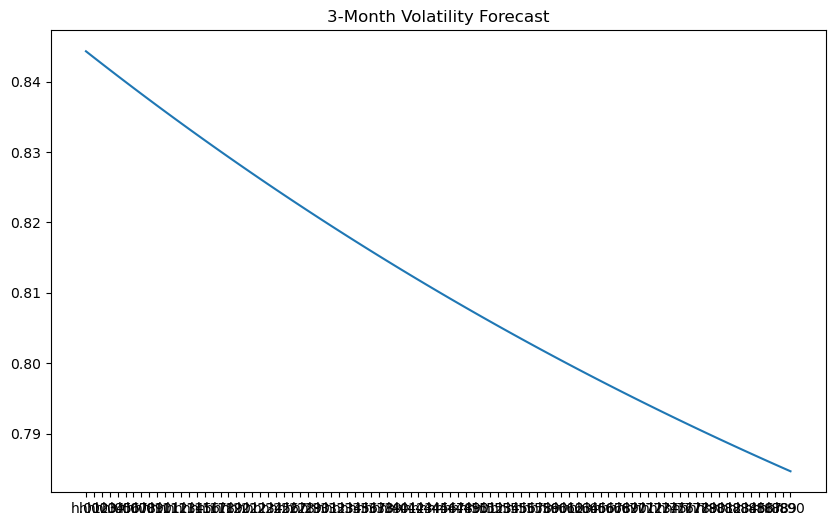

In [11]:
# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(forecast.variance[-1:].T)
plt.title('3-Month Volatility Forecast')
plt.show()

## **Part B**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.stattools import adfuller

In [14]:
# Load the data from the Excel file
file_path = 'CMO-Historical-Data-Annual.xlsx'
df = pd.read_excel(file_path, sheet_name='Annual Prices (Nominal)')

In [15]:
# Drop all columns except for the required ones
columns_to_keep = ['Date', 'Sugar, EU', 'Sugar, US', 'Sugar, world']
df = df[columns_to_keep]

In [16]:
# Filter the data from 2003 to 2023
df = df[(df['Date'] >= 2003) & (df['Date'] <= 2023)]
df.set_index('Date', inplace=True)

df.head

<bound method NDFrame.head of        Sugar, EU Sugar, US Sugar, world
Date                                   
2003.0  0.597145  0.473711     0.156302
2004.0  0.669688  0.454679     0.157986
2005.0  0.665422  0.469265     0.217927
2006.0  0.645641  0.487646     0.325872
2007.0  0.680913  0.457746     0.222152
2008.0  0.696927  0.468582     0.282136
2009.0  0.524352  0.548751     0.400028
2010.0  0.441791  0.792485     0.469347
2011.0  0.454617  0.839157     0.573164
2012.0  0.420135   0.63564     0.474945
2013.0  0.433829  0.450501     0.390045
2014.0  0.434012  0.532508     0.374987
2015.0  0.362555  0.546783     0.296264
2016.0  0.361461  0.609247     0.398063
2017.0  0.368754  0.615548     0.353125
2018.0  0.385852  0.559257     0.275614
2019.0  0.365668  0.576729     0.280023
2020.0  0.372711   0.59466     0.283128
2021.0  0.386476  0.740146     0.389556
2022.0  0.344235  0.787729     0.407836
2023.0  0.353262  0.894929     0.516469>

In [17]:
# Save the filtered data to a CSV file
df.to_csv('Sugar_commodity_prices.csv')

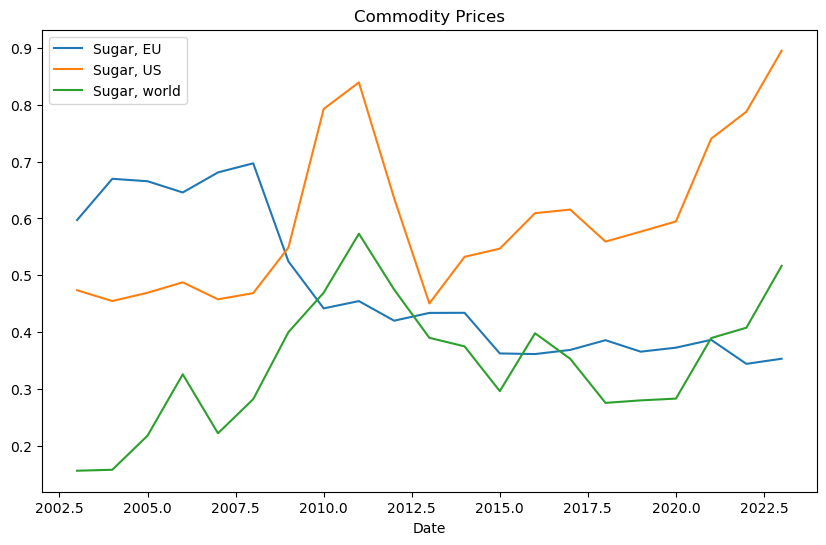

In [18]:
# Step 2: Plot the data
df.plot(figsize=(10, 6))
plt.title('Commodity Prices')
plt.show()

In [19]:
# Step 3: Check for stationarity using ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out)
    print('')

# Apply ADF test for each commodity
for column in df.columns:
    adf_test(df[column], title=column)

Augmented Dickey-Fuller Test: Sugar, EU
ADF Test Statistic             -2.306263
p-value                         0.169956
# Lags Used                     8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

Augmented Dickey-Fuller Test: Sugar, US
ADF Test Statistic             -2.189582
p-value                         0.210048
# Lags Used                     1.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64

Augmented Dickey-Fuller Test: Sugar, world
ADF Test Statistic             -3.223598
p-value                         0.018659
# Lags Used                     7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)     

In [20]:
# Step 4: Differencing the series if not stationary
df_diff = df.diff().dropna()

# Convert all columns to numeric (if they are not already)
df_diff = df_diff.apply(pd.to_numeric, errors='coerce')

# Handle any potential NaN values that might be introduced
df_diff = df_diff.dropna()

# Check stationarity of differenced data
for column in df_diff.columns:
    adf_test(df_diff[column], title=f'{column} Differenced')

Augmented Dickey-Fuller Test: Sugar, EU Differenced
ADF Test Statistic             -3.079060
p-value                         0.028142
# Lags Used                     8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

Augmented Dickey-Fuller Test: Sugar, US Differenced
ADF Test Statistic             -2.986319
p-value                         0.036192
# Lags Used                     0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64

Augmented Dickey-Fuller Test: Sugar, world Differenced
ADF Test Statistic             -1.441717
p-value                         0.562121
# Lags Used                     8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)           

In [21]:
# Step 5: Fit VAR model if series are stationary
# Automatically select the optimal lag length based on information criteria
model = VAR(df_diff)
lag_order = model.select_order().aic  # Select lag length based on AIC
print(f'Selected Lag Length: {lag_order}')

# Fit the VAR model with the selected lag length
results = model.fit(lag_order)
print(results.summary())

Selected Lag Length: 4
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Jul, 2024
Time:                     19:51:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -20.2209
Nobs:                     16.0000    HQIC:                  -22.0077
Log likelihood:           147.724    FPE:                1.73360e-09
AIC:                     -22.1041    Det(Omega_mle):     2.91149e-10
--------------------------------------------------------------------
Results for equation Sugar, EU
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.019242         0.015736           -1.223           0.221
L1.Sugar, EU            0.541359         0.695865            0.778           0.437
L1.Sugar, US            0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# Step 6: Fit VECM model if series are non-stationary but cointegrated
def johansen_test(df, det_order=-1, k_ar_diff=1):
    # Ensure the data is numeric and handle missing values
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()
    
    # Perform Johansen cointegration test
    coint_test = coint_johansen(df, det_order, k_ar_diff)
    return coint_test

# Johansen cointegration test
johansen_result = johansen_test(df, det_order=0, k_ar_diff=1)
print('Johansen Test Statistic:', johansen_result.lr1)
print('Critical Values (90%, 95%, 99%):', johansen_result.cvt)

Johansen Test Statistic: [33.99450188 15.59962649  2.7709564 ]
Critical Values (90%, 95%, 99%): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [23]:
# Ensure the data is numeric for VECM
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Fit VECM model if cointegrated
# Adjust `coint_rank` based on the Johansen test results
vecm = VECM(df, k_ar_diff=1, coint_rank=1)
vecm_results = vecm.fit()
print(vecm_results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Sugar, EU
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.Sugar, EU        0.0483      0.245      0.197      0.844      -0.432       0.528
L1.Sugar, US        0.0175      0.172      0.102      0.919      -0.319       0.354
L1.Sugar, world    -0.2232      0.201     -1.110      0.267      -0.617       0.171
Det. terms outside the coint. relation & lagged endog. parameters for equation Sugar, US
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.Sugar, EU       -1.1656      0.408     -2.853      0.004      -1.966      -0.365
L1.Sugar, US       -0.0334      0.287     -0.116      0.907      -0.595       0.529
L1.Sugar, world     0.0812      0.335      0.242      0.809      -

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [3]:
# Download data
ticker = "^IXIC"  # Adjust the ticker as per the Yahoo Finance listing
start_date = '2022-04-01'
end_date = '2024-03-31'

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns

In [5]:
# Display the first few rows of the data
print(data.head())

                    Open          High           Low         Close  \
Date                                                                 
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   
2022-04-07  13861.490234  13978.250000  13689.230469  13897.299805   

               Adj Close      Volume  
Date                                  
2022-04-01  14261.500000  5002790000  
2022-04-04  14532.549805  4630100000  
2022-04-05  14204.169922  4727710000  
2022-04-06  13888.820312  5360420000  
2022-04-07  13897.299805  4856090000  


In [6]:
# Calculate returns
data['Return'] = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns
data = data.dropna()  # Drop rows with NaN values resulting from pct_change()

In [7]:
# Check for ARCH effects using the Ljung-Box test on squared returns
lb_test = sm.stats.diagnostic.acorr_ljungbox(data['Return']**2, lags=[10], return_df=True)
print('Ljung-Box test for ARCH effects:')
print(lb_test)

Ljung-Box test for ARCH effects:
      lb_stat     lb_pvalue
10  85.481431  4.194475e-14


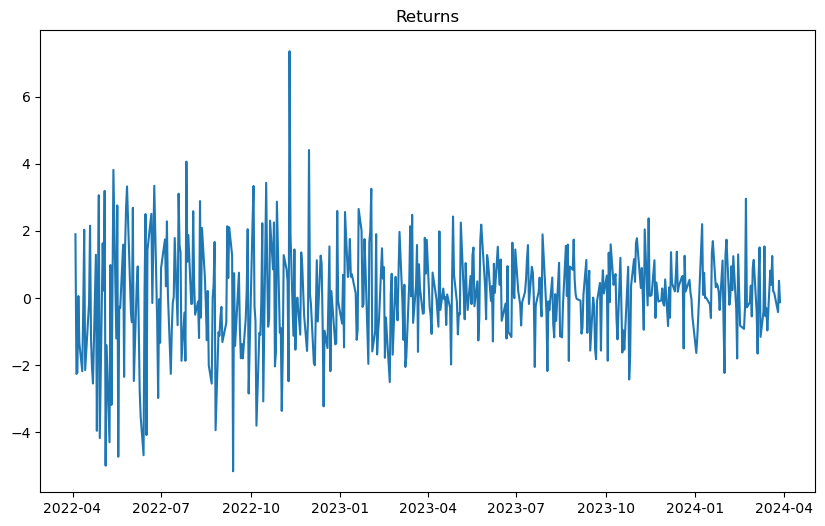

In [8]:
# Check for ARCH/GARCH effects
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.title('Returns')
plt.show()

In [9]:
# Fit an ARCH/GARCH model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit(disp='off')
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -863.743
Distribution:                  Normal   AIC:                           1735.49
Method:            Maximum Likelihood   BIC:                           1752.34
                                        No. Observations:                  499
Date:                Tue, Jul 23 2024   Df Residuals:                      498
Time:                        19:51:48   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0996  5.789e-02      1.721  8.533e-02 [-1.38

In [10]:
# Forecast the three-month volatility
forecast = results.forecast(horizon=90)
volatility_forecast = forecast.variance[-1:]  # Last forecasted variance
volatility_forecast = volatility_forecast.apply(lambda x: x**0.5)  # Convert to standard deviation
print(volatility_forecast)

                h.01      h.02    h.03      h.04      h.05      h.06  \
Date                                                                   
2024-03-28  0.918856  0.918377  0.9179  0.917427  0.916956  0.916488   

                h.07     h.08    h.09      h.10  ...      h.81      h.82  \
Date                                             ...                       
2024-03-28  0.916022  0.91556  0.9151  0.914644  ...  0.888396  0.888102   

               h.83     h.84      h.85      h.86     h.87      h.88      h.89  \
Date                                                                            
2024-03-28  0.88781  0.88752  0.887231  0.886945  0.88666  0.886377  0.886095   

                h.90  
Date                  
2024-03-28  0.885816  

[1 rows x 90 columns]


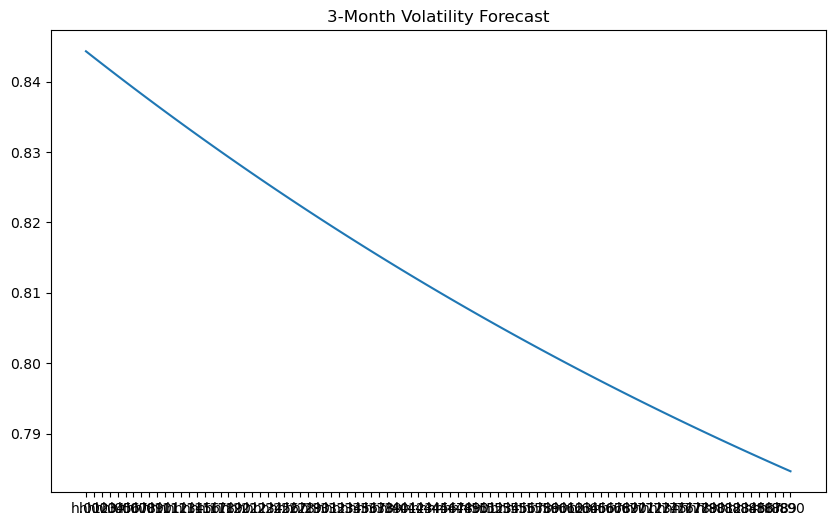

In [11]:
# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(forecast.variance[-1:].T)
plt.title('3-Month Volatility Forecast')
plt.show()

## **Part B**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.stattools import adfuller

In [14]:
# Load the data from the Excel file
file_path = 'CMO-Historical-Data-Annual.xlsx'
df = pd.read_excel(file_path, sheet_name='Annual Prices (Nominal)')

In [15]:
# Drop all columns except for the required ones
columns_to_keep = ['Date', 'Sugar, EU', 'Sugar, US', 'Sugar, world']
df = df[columns_to_keep]

In [16]:
# Filter the data from 2003 to 2023
df = df[(df['Date'] >= 2003) & (df['Date'] <= 2023)]
df.set_index('Date', inplace=True)

df.head

<bound method NDFrame.head of        Sugar, EU Sugar, US Sugar, world
Date                                   
2003.0  0.597145  0.473711     0.156302
2004.0  0.669688  0.454679     0.157986
2005.0  0.665422  0.469265     0.217927
2006.0  0.645641  0.487646     0.325872
2007.0  0.680913  0.457746     0.222152
2008.0  0.696927  0.468582     0.282136
2009.0  0.524352  0.548751     0.400028
2010.0  0.441791  0.792485     0.469347
2011.0  0.454617  0.839157     0.573164
2012.0  0.420135   0.63564     0.474945
2013.0  0.433829  0.450501     0.390045
2014.0  0.434012  0.532508     0.374987
2015.0  0.362555  0.546783     0.296264
2016.0  0.361461  0.609247     0.398063
2017.0  0.368754  0.615548     0.353125
2018.0  0.385852  0.559257     0.275614
2019.0  0.365668  0.576729     0.280023
2020.0  0.372711   0.59466     0.283128
2021.0  0.386476  0.740146     0.389556
2022.0  0.344235  0.787729     0.407836
2023.0  0.353262  0.894929     0.516469>

In [17]:
# Save the filtered data to a CSV file
df.to_csv('Sugar_commodity_prices.csv')

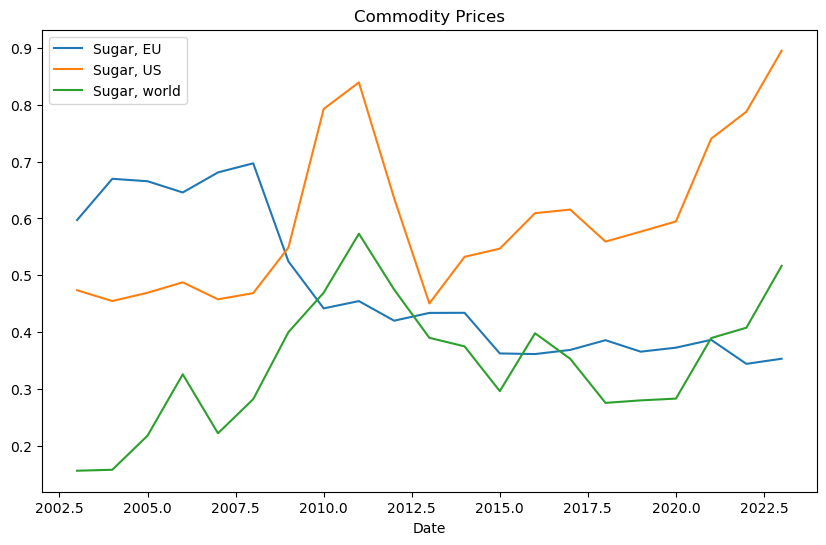

In [18]:
# Step 2: Plot the data
df.plot(figsize=(10, 6))
plt.title('Commodity Prices')
plt.show()

In [19]:
# Step 3: Check for stationarity using ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out)
    print('')

# Apply ADF test for each commodity
for column in df.columns:
    adf_test(df[column], title=column)

Augmented Dickey-Fuller Test: Sugar, EU
ADF Test Statistic             -2.306263
p-value                         0.169956
# Lags Used                     8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

Augmented Dickey-Fuller Test: Sugar, US
ADF Test Statistic             -2.189582
p-value                         0.210048
# Lags Used                     1.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64

Augmented Dickey-Fuller Test: Sugar, world
ADF Test Statistic             -3.223598
p-value                         0.018659
# Lags Used                     7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)     

In [20]:
# Step 4: Differencing the series if not stationary
df_diff = df.diff().dropna()

# Convert all columns to numeric (if they are not already)
df_diff = df_diff.apply(pd.to_numeric, errors='coerce')

# Handle any potential NaN values that might be introduced
df_diff = df_diff.dropna()

# Check stationarity of differenced data
for column in df_diff.columns:
    adf_test(df_diff[column], title=f'{column} Differenced')

Augmented Dickey-Fuller Test: Sugar, EU Differenced
ADF Test Statistic             -3.079060
p-value                         0.028142
# Lags Used                     8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

Augmented Dickey-Fuller Test: Sugar, US Differenced
ADF Test Statistic             -2.986319
p-value                         0.036192
# Lags Used                     0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64

Augmented Dickey-Fuller Test: Sugar, world Differenced
ADF Test Statistic             -1.441717
p-value                         0.562121
# Lags Used                     8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)           

In [21]:
# Step 5: Fit VAR model if series are stationary
# Automatically select the optimal lag length based on information criteria
model = VAR(df_diff)
lag_order = model.select_order().aic  # Select lag length based on AIC
print(f'Selected Lag Length: {lag_order}')

# Fit the VAR model with the selected lag length
results = model.fit(lag_order)
print(results.summary())

Selected Lag Length: 4
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Jul, 2024
Time:                     19:51:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -20.2209
Nobs:                     16.0000    HQIC:                  -22.0077
Log likelihood:           147.724    FPE:                1.73360e-09
AIC:                     -22.1041    Det(Omega_mle):     2.91149e-10
--------------------------------------------------------------------
Results for equation Sugar, EU
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.019242         0.015736           -1.223           0.221
L1.Sugar, EU            0.541359         0.695865            0.778           0.437
L1.Sugar, US            0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# Step 6: Fit VECM model if series are non-stationary but cointegrated
def johansen_test(df, det_order=-1, k_ar_diff=1):
    # Ensure the data is numeric and handle missing values
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()
    
    # Perform Johansen cointegration test
    coint_test = coint_johansen(df, det_order, k_ar_diff)
    return coint_test

# Johansen cointegration test
johansen_result = johansen_test(df, det_order=0, k_ar_diff=1)
print('Johansen Test Statistic:', johansen_result.lr1)
print('Critical Values (90%, 95%, 99%):', johansen_result.cvt)

Johansen Test Statistic: [33.99450188 15.59962649  2.7709564 ]
Critical Values (90%, 95%, 99%): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [23]:
# Ensure the data is numeric for VECM
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Fit VECM model if cointegrated
# Adjust `coint_rank` based on the Johansen test results
vecm = VECM(df, k_ar_diff=1, coint_rank=1)
vecm_results = vecm.fit()
print(vecm_results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Sugar, EU
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.Sugar, EU        0.0483      0.245      0.197      0.844      -0.432       0.528
L1.Sugar, US        0.0175      0.172      0.102      0.919      -0.319       0.354
L1.Sugar, world    -0.2232      0.201     -1.110      0.267      -0.617       0.171
Det. terms outside the coint. relation & lagged endog. parameters for equation Sugar, US
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.Sugar, EU       -1.1656      0.408     -2.853      0.004      -1.966      -0.365
L1.Sugar, US       -0.0334      0.287     -0.116      0.907      -0.595       0.529
L1.Sugar, world     0.0812      0.335      0.242      0.809      -

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
